# Supply Chain Greenhouse Gas Emission Factors

## Description of the Data:

This dataset shows how much greenhouse gas (GHG) pollution is created when people spend money on different products and services in the U.S. It’s organized using 6-digit industry codes from the 2017 NAICS (North American Industry Classification System).

The data is based on emissions from the year 2022 and includes 1,016 commodities (except for electricity, government, and household services, which are not included).

Each row represents a product or service and shows how much pollution is generated for every $1 spent on it. The pollution is measured in kilograms of CO₂-equivalent (kg CO₂e) which combines all greenhouse gases into one number so they’re easier to compare.



## Exploring the Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("https://github.com/jessicawaters/Supply-Chain-Greenhouse-Gas-Emission-Factors/raw/refs/heads/main/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv")

In [14]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [16]:
df.duplicated().sum()

np.int64(0)

## Top 10 Commodities with the Highest Emissions

This chart shows the 10 products or services with the highest greenhouse gas emissions per $1 spent. It uses the combined emissions (SEF + MEF), which includes both supply chain production and retail/transport margins.

In [17]:
# Sort by total emissions and get top 10
top10 = df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

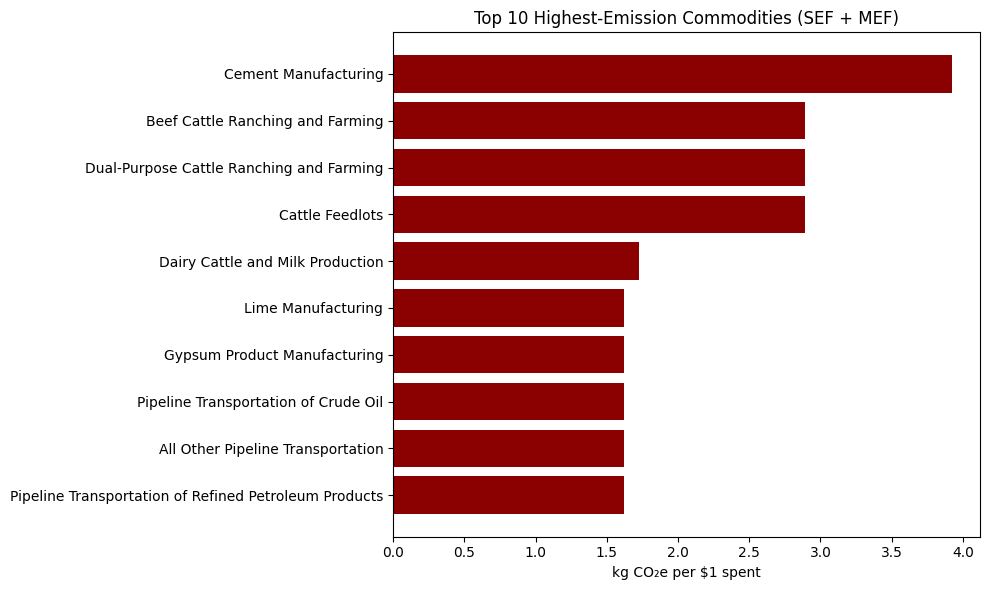

,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors with Margins
285,327310,Cement Manufacturing,3.924
30,112111,Beef Cattle Ranching and Farming,2.893
33,112130,Dual-Purpose Cattle Ranching and Farming,2.893
31,112112,Cattle Feedlots,2.893
32,112120,Dairy Cattle and Milk Production,1.724
290,327410,Lime Manufacturing,1.623
291,327420,Gypsum Product Manufacturing,1.623
653,486110,Pipeline Transportation of Crude Oil,1.619
656,486990,All Other Pipeline Transportation,1.619
655,486910,Pipeline Transportation of Refined Petroleum P...,1.619


In [18]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['2017 NAICS Title'], top10['Supply Chain Emission Factors with Margins'], color='darkred')
plt.xlabel('kg CO₂e per $1 spent')
plt.title('Top 10 Highest-Emission Commodities (SEF + MEF)')
plt.gca().invert_yaxis()  # highest value at the top
plt.tight_layout()
plt.show()

# Show the table for reference
top10[['2017 NAICS Code', '2017 NAICS Title', 'Supply Chain Emission Factors with Margins']]

## SEF vs. SEF + MEF Comparison

This chart compares emissions from just the supply chain (SEF) to total emissions including margins (SEF + MEF) for the top 10 emitting commodities. It helps show how much pollution is added through transport, wholesale, and retail.

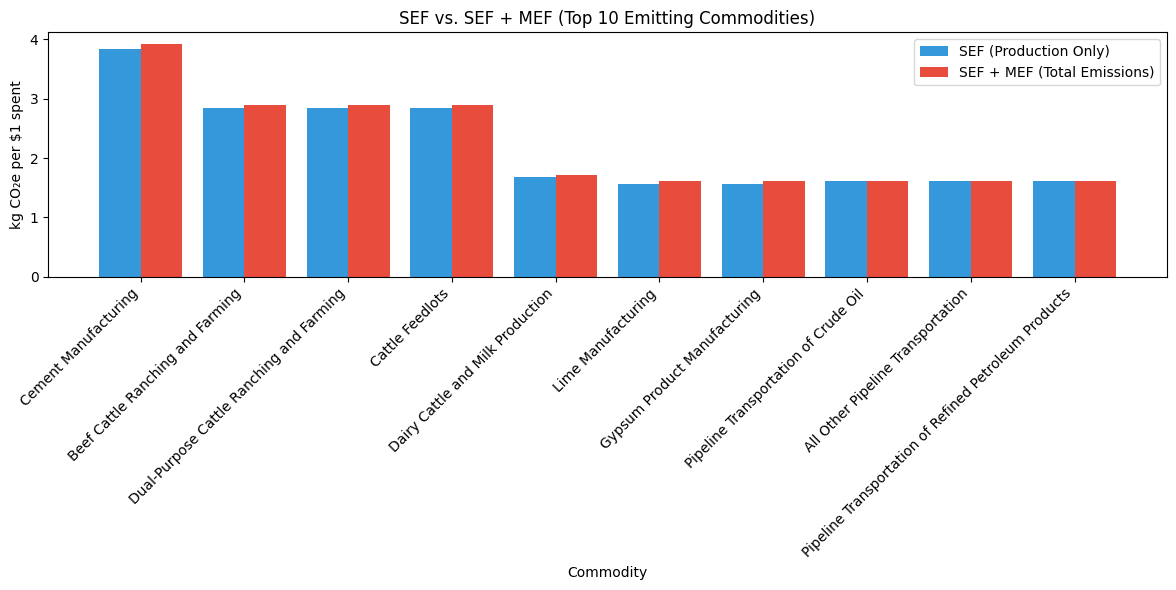

In [19]:
# Get top 10 by total emissions
top10 = df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Set position for side-by-side bars
bar_width = 0.4
index = np.arange(len(top10))

# Create figure
plt.figure(figsize=(12, 6))

# Bar 1: SEF (Production Only) — Blue
plt.bar(index, top10['Supply Chain Emission Factors without Margins'],
        width=bar_width, label='SEF (Production Only)', color='#3498db')

# Bar 2: SEF + MEF (Total Emissions) — Red
plt.bar(index + bar_width, top10['Supply Chain Emission Factors with Margins'],
        width=bar_width, label='SEF + MEF (Total Emissions)', color='#e74c3c')

# Labels & Titles
plt.xlabel('Commodity')
plt.ylabel('kg CO₂e per $1 spent')
plt.title('SEF vs. SEF + MEF (Top 10 Emitting Commodities)')
plt.xticks(index + bar_width / 2, top10['2017 NAICS Title'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Total Emissions by Sector

This chart groups commodities by their major NAICS sector (using the first 2 digits of the NAICS code) and shows the average greenhouse gas emissions per $1 spent for each sector. It helps identify which types of industries are the most emission-intensive overall.

/tmp/ipython-input-20-4284982634.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_avg_named.values, y=sector_avg_named.index, palette='viridis')


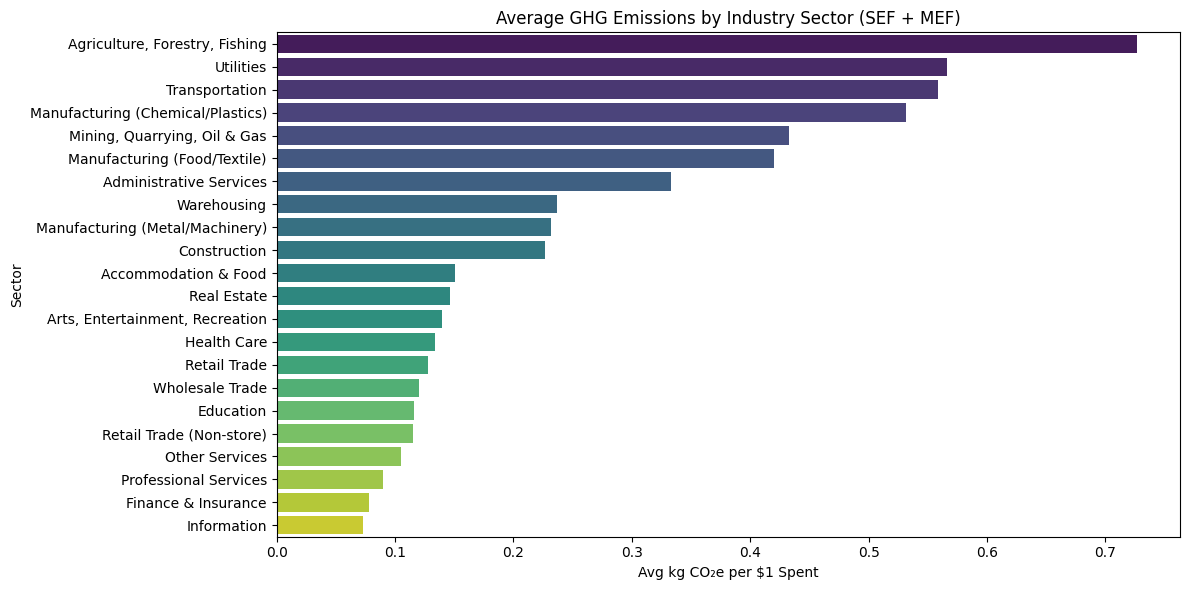

In [20]:
# Create 2-digit NAICS code column
df['Sector Code'] = df['2017 NAICS Code'].astype(str).str[:2]

# Map NAICS Sector Codes to Names
naics_sector_names = {
    '11': 'Agriculture, Forestry, Fishing',
    '21': 'Mining, Quarrying, Oil & Gas',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing (Food/Textile)',
    '32': 'Manufacturing (Chemical/Plastics)',
    '33': 'Manufacturing (Metal/Machinery)',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade (Non-store)',
    '48': 'Transportation',
    '49': 'Warehousing',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate',
    '54': 'Professional Services',
    '56': 'Administrative Services',
    '61': 'Education',
    '62': 'Health Care',
    '71': 'Arts, Entertainment, Recreation',
    '72': 'Accommodation & Food',
    '81': 'Other Services'
}

# Apply mapping
df['Sector Name'] = df['Sector Code'].map(naics_sector_names)

# Group by sector name
sector_avg_named = df.groupby('Sector Name')['Supply Chain Emission Factors with Margins'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_avg_named.values, y=sector_avg_named.index, palette='viridis')
plt.xlabel('Avg kg CO₂e per $1 Spent')
plt.ylabel('Sector')
plt.title('Average GHG Emissions by Industry Sector (SEF + MEF)')
plt.tight_layout()
plt.show()

## Emission Leaders in Agriculture, Forestry, and Fishing

This bar chart highlights the top 10 commodities within the agriculture, forestry, and fishing sector based on their greenhouse gas (GHG) emission factors. Items like oilseed farming and aquaculture stand out as major contributors.

/tmp/ipython-input-21-2040542470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


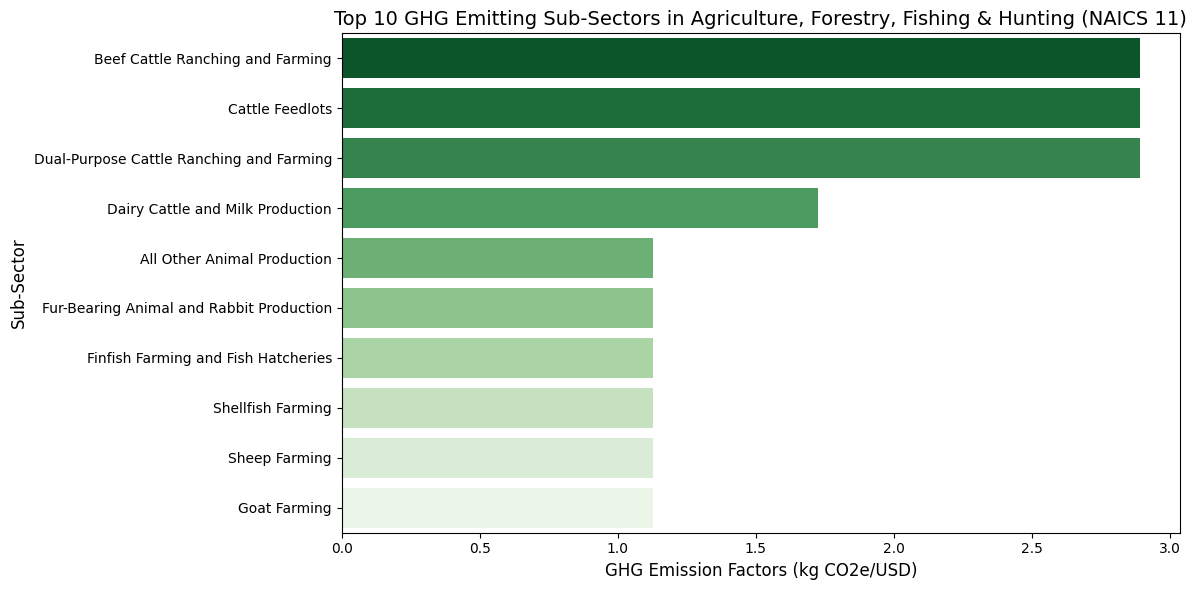

In [21]:
# Filter for Agriculture, Forestry, Fishing and Hunting (NAICS codes starting with '11')
agriculture_df = df[df['2017 NAICS Code'].astype(str).str.startswith('11')]

# Sort by emission factor with margins
agriculture_df_sorted = agriculture_df.sort_values(
    by='Supply Chain Emission Factors with Margins', ascending=False
)

# Plot top 10 sub-sectors in Agriculture
plt.figure(figsize=(12, 6))
sns.barplot(
    data=agriculture_df_sorted.head(10),
    x='Supply Chain Emission Factors with Margins',
    y='2017 NAICS Title',
    palette='Greens_r'
)
plt.title('Top 10 GHG Emitting Sub-Sectors in Agriculture, Forestry, Fishing & Hunting (NAICS 11)', fontsize=14)
plt.xlabel('GHG Emission Factors (kg CO2e/USD)', fontsize=12)
plt.ylabel('Sub-Sector', fontsize=12)
plt.tight_layout()
plt.show()

## Distribution of Emissions Across All Commodities

This histogram shows how many commodities fall into different emission ranges. It helps reveal whether most products cause only small amounts of pollution per dollar, or if a few industries dominate the overall emissions.

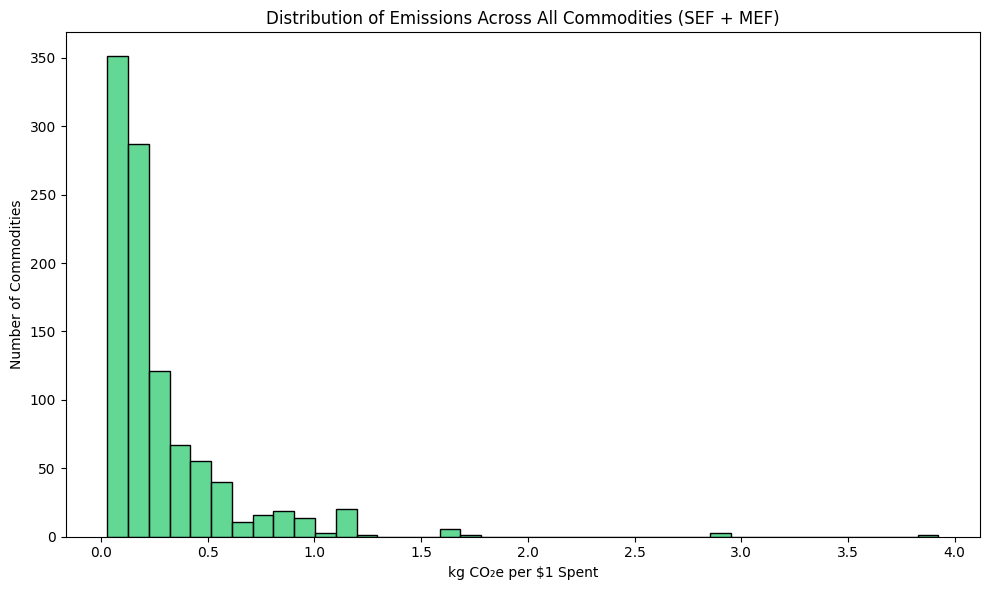

In [22]:
# Histogram of Total Emissions (SEF + MEF)

plt.figure(figsize=(10, 6))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=40, color='#2ecc71', edgecolor='black')
plt.xlabel('kg CO₂e per $1 Spent')
plt.ylabel('Number of Commodities')
plt.title('Distribution of Emissions Across All Commodities (SEF + MEF)')
plt.tight_layout()
plt.show()

## Conclusion

This project explored greenhouse gas emission factors across over 1,000 U.S. commodities using data categorized by NAICS industry codes. While the majority of commodities emit relatively low amounts of CO₂-equivalent gases per dollar spent, a small subset, particularly in the agriculture, forestry, and fishing sectors, contribute disproportionately to overall emissions.

The difference between supply chain emissions with and without margin adjustments was minimal, suggesting that the **production stage itself** is the primary source of emissions rather than secondary activities like transportation or retail. This conclusion was further supported by the histogram distribution and sectoral breakdowns, where just a few high-emitting commodities like oilseed farming and fishing acted as outliers in an otherwise low-emission landscape.

Future work could involve combining this dataset with economic data on consumer spending or production volume to assess not just the intensity of emissions per dollar, but the total emissions impact by industry. This would help prioritize mitigation strategies where they matter most.